<h3 style="color:red;">Preterm neonate of 25 weeks of gestation and 0.72 kg with different sizes of persistent ductus arteriosus </h3>


In [18]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(False)
neo.metabolism(False)
neo.mob(False)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# stabilize the model by calculating 120 seconds
neo.calculate(120)

# scale the model to a premature neonate of 25 weeks and 0.72 kg and recalculate 120 seconds
model._scaling.res_factor_circ_correction = 0.6
model._scaling.el_max_factor_correction = 0.8
model._scaling.scale_patient(
    target_weight=0.720,
    target_height=0.32,
    target_blood_volume=0.08,
    target_hr_ref=160,
    target_map=35.0,
)

# stabilize the model by calculating 120 seconds
neo.calculate(120)

# put patient on CPAP
neo.ventilator(True)
models["Ventilator"].set_ventilator_cpap(peep=6.0)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 6.7 sec. Average model step in 0.0278 ms.
 Ready in 7.2 sec. Average model step in 0.0298 ms.


<h5 style="color:red;">Model run results - No PDA</h5>

In [ ]:
neo.validate()

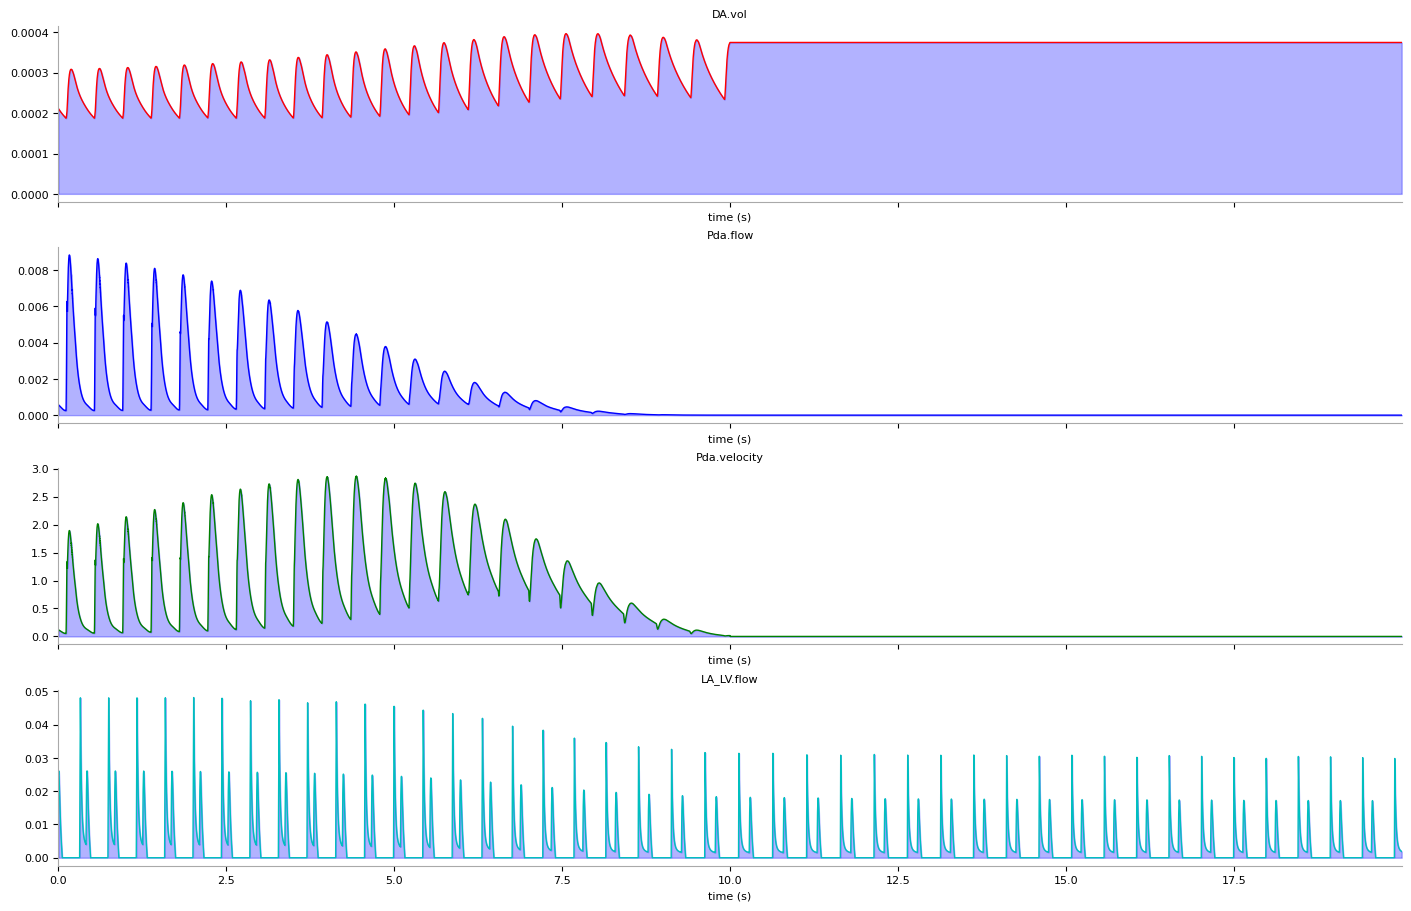

DA.vol          : max    0.55137, min    0.26028 ml/kg
Pda.flow        : net   66.60336, forward   66.60336, backward        0.0 ml/kg/min
Pda.velocity    : max    2.86503 min        0.0
LA_LV.flow      : net  307.85224, forward  307.85224, backward        0.0 ml/kg/min, stroke volume:    2.38639 ml/kg, 


In [16]:
neo.pda(True)
models["DA"].el_base = 35000.0
# models["AAR_DA"].r_for = 500.0
# models["AAR_DA"].r_back = 500.0
#models["Pda"].open_ductus(new_diameter=3.5, in_time=10.0)
models["Pda"].close_ductus(in_time=10.0)
neo.plot_time_graph(
    ["DA.vol", "Pda.flow", "Pda.velocity", "LA_LV.flow"],
    time_to_calculate=20,
    analyze=True,
    weight_based=True,
    sharey=False,
    combined=False,
    sampleinterval=0.0005
)

In [17]:
neo.analyze_heart()

AA.pres         : max   52.95311, min   27.57651 mmHg
AD.pres         : max   51.55754, min   27.50719 mmHg
PA.pres         : max   25.70432, min   11.25838 mmHg
LA_LV.flow      : net  241.17982, forward  241.17982, backward        0.0 ml/kg/min, stroke volume:     1.8696 ml/kg, 
RA_RV.flow      : net  239.72771, forward  239.72771, backward        0.0 ml/kg/min, stroke volume:    1.85834 ml/kg, 
RV_PA.flow      : net  239.49178, forward  239.49178, backward        0.0 ml/kg/min, stroke volume:    1.85651 ml/kg, 
LV_AA.flow      : net  240.95903, forward  240.95903, backward        0.0 ml/kg/min, stroke volume:    1.86788 ml/kg, 
COR_RA.flow     : net    2.88222, forward    2.88222, backward        0.0 ml/kg/min, stroke volume:    0.02234 ml/kg, 
IVCI_RA.flow    : net  131.66848, forward  139.85951, backward   -8.19103 ml/kg/min, stroke volume:    1.02068 ml/kg, 
SVC_RA.flow     : net  106.16634, forward  113.19939, backward   -7.03305 ml/kg/min, stroke volume:    0.82299 ml/kg, 
Pda.f

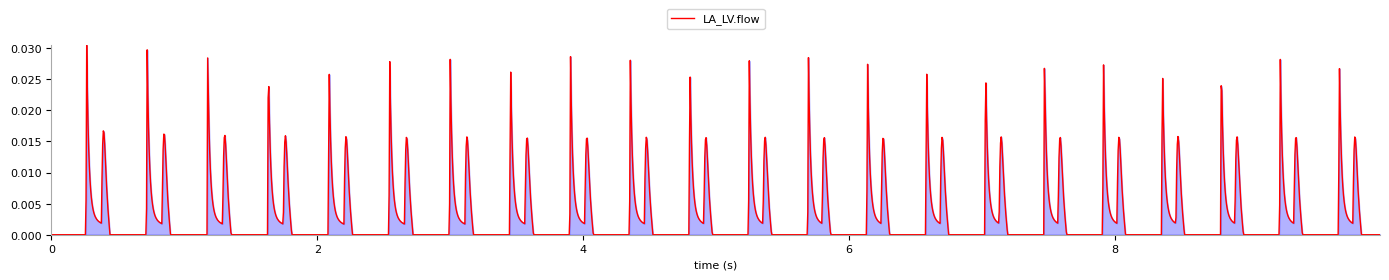

Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
LA_LV.flow      : net  171.91176, forward  171.91176, backward        0.0 ml/min, stroke volume:     1.2706 ml, 


In [19]:
neo.plot_time_graph(["LA_LV.flow"])

Broadhouse KM, Price AN, Durighel G, Cox DJ, Finnemore AE, Edwards AD, Hajnal JV, Groves AM. Assessment of PDA shunt and systemic blood flow in newborns using cardiac MRI. NMR Biomed. 2013 Sep;26(9):1135-41. doi: 10.1002/nbm.2927. Epub 2013 Feb 15. PMID: 23412748.

Bischoff AR, Giesinger RE, Stanford AH, Ashwath R, McNamara PJ. Assessment of superior vena cava flow and cardiac output in different patterns of patent ductus arteriosus shunt. Echocardiography. 2021 Sep;38(9):1524-1533. doi: 10.1111/echo.15163. Epub 2021 Jul 26. PMID: 34309068.

de Freitas Martins F, Ibarra Rios D, F Resende MH, Javed H, Weisz D, Jain A, de Andrade Lopes JM, McNamara PJ. Relationship of Patent Ductus Arteriosus Size to Echocardiographic Markers of Shunt Volume. J Pediatr. 2018 Nov;202:50-55.e3. doi: 10.1016/j.jpeds.2018.06.045. Epub 2018 Aug 13. PMID: 30115452.